In [291]:
 from sympy import *
init_printing()

In [292]:
x = Symbol('x')
EI = Symbol('EI')
R = Symbol('R')
omega = Symbol('omega')
ll = Symbol('lambda')

In [293]:
gamma_1 = x

In [294]:
gamma_2 = 10*x**3/3 - 10*x**4/3 + x**5

In [295]:
A11 = integrate(gamma_1*gamma_1, (x, 0, 1))

In [296]:
A12 = integrate(gamma_1*gamma_2, (x, 0, 1))

In [297]:
A12

In [298]:
A22 = integrate(gamma_2*gamma_2, (x, 0, 1))

In [299]:
G = integrate(omega**2*x, (x,x*R, R))

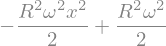

In [300]:
G

In [301]:
def calcB(gamma_1, gamma_2):
    der1_2 = diff(gamma_1,x,2)
    der1_1 = diff(gamma_1,x,1)
    der2_1 = diff(gamma_2,x,1)
    integrando = EI*der1_2*der2_2+R**2*G*der1_1*der2_1
    sol = integrate(integrando,(x, 0, 1))/(2*R)/(omega**2*R**3)
    return(sol*2)

In [302]:
B11 = calcB(gamma_1, gamma_1)

In [303]:
B12 = calcB(gamma_1, gamma_2)

In [304]:
B22 = calcB(gamma_2, gamma_2).simplify()

In [305]:
k = Symbol('k')

In [306]:
B22 = B22.subs(EI,k*R**4*omega**2)

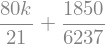

In [307]:
B22

In [308]:
LHS =  Matrix([[B11, B12], [B12, B22]])- ll**2*Matrix([[A11, A12], [A12, A22]])

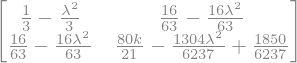

In [309]:
LHS

In [310]:
determinante = det(LHS).subs(k,0.004).simplify()

In [311]:
factor(determinante)

In [313]:
soluciones = roots(determinante)

In [375]:
sol = list(soluciones.keys());

In [376]:
sol

In [349]:
phi_1 = Symbol('phi_1')
phi_2 = Symbol('phi_2')

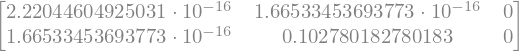

In [378]:
Sistema = LHS.subs(k,0.004).subs(ll, sol[2])
Sistema = Sistema.col_insert(2, Matrix([0, 0]))
solve_linear_system(Sistema, phi_1, phi_2)
Sistema

In [379]:
Modo1 = gamma_1

In [368]:
Sistema = LHS.subs(k,0.004).subs(ll, sol[3])
Sistema = Sistema.col_insert(2, Matrix([0, 0]))
solve_linear_system(Sistema, phi_1, phi_2)

In [389]:
Modo2 = -0.76*gamma_1+gamma_2
Modo2 = Modo2/Modo2.subs(x,1.0)

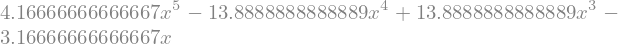

In [390]:
Modo2

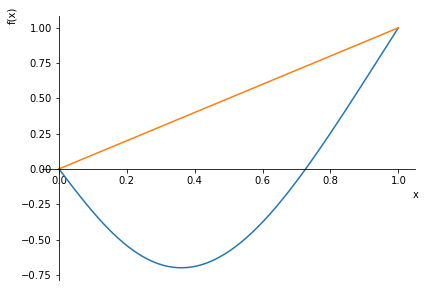

In [391]:
p1 = plot(Modo2,Modo1,(x, 0, 1))